In [1]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import cupy as cp
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from time import time
import datetime
import os
os.chdir("/local-scratch/GlucoseProject/mobicom23_mobispectral/regression")
import sys
sys.path.append(os.getcwd())
from evaluate import *
from utils import *
from dict_dataset import ImageList

In [2]:
data_root = '../datasets/dataset_glucose/Hyperspectral'
file_train = 'train_data.csv'
file_test = 'test_data.csv'
step = 1

In [3]:
X_train, y_train, X_test, y_test, test_data = prepare_data(data_root, file_train, file_test, step, 'hyper')
# X_train, X_val, y_train, y_val = TTS(X_train, y_train, test_size=0.3, random_state=42)

Loading hyper dataset
Loading hyper dataset


In [4]:
# scaler = MinMaxScaler()
x_scaler = RobustScaler()
# y_scaler = RobustScaler()
# x_scaler = StandardScaler()
# y_scaler = StandardScaler()
# scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
X_test = x_scaler.transform(X_test)
# y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
# y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

In [9]:
# Step 1, Threshold 30, 8 features selected
selected_features_indices = [ 68,  99, 106, 127, 129, 146, 177, 179]
X_train = X_train[:, selected_features_indices]
X_val = X_val[:, selected_features_indices]
X_test = X_test[:, selected_features_indices]

for image in test_data:
    image['sig'] = image['sig'][:, selected_features_indices]
test_data

In [ ]:
#如果开启参数slient：在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个参数来监控模型的训练进度
model = XGBRegressor(n_estimators=10,silent=True)#xgboost库silent=True不会打印训练进程，只返回运行结果，默认是False会打印训练进程
#sklearn库中的xgbsoost的默认为silent=True不会打印训练进程，想打印需要手动设置为False
CVS(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error').mean()#-92.67865836936579

-92.67865836936579

In [5]:
def plot_learning_curve(estimator,title, X, y, 
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,random_state=420
                                                            ,n_jobs=n_jobs)      
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [5]:
cv = KFold(n_splits=5, shuffle = True, random_state=42) #交叉验证模式

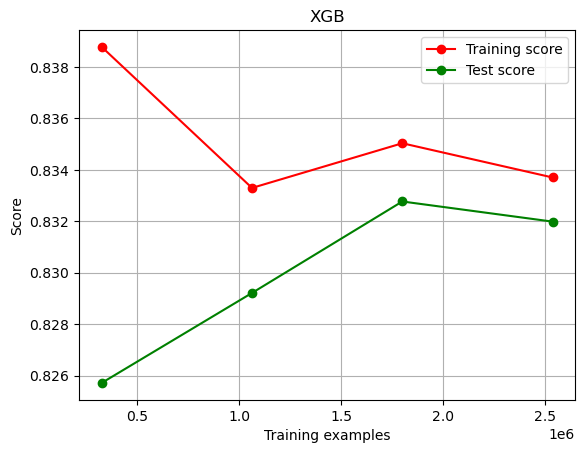

In [15]:
plot_learning_curve(XGBRegressor(n_estimators=100,random_state=42, tree_method='hist', device='cuda', n_jobs=-1)
                    ,"XGB",X_train,y_train,ax=None,cv=cv)
plt.show()

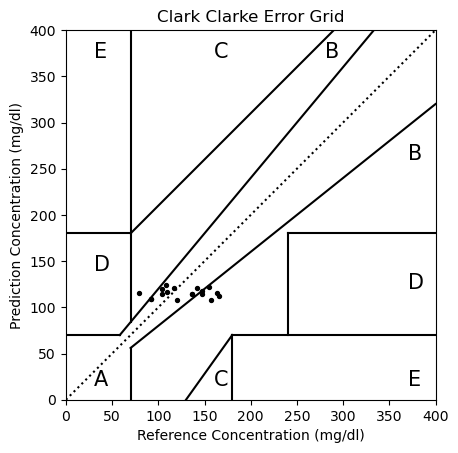

In [7]:
model = XGBRegressor(random_state=42, tree_method='hist', device='cuda', n_jobs=-1)
model.fit(X_train, y_train)
evaluate_image(test_data, model)


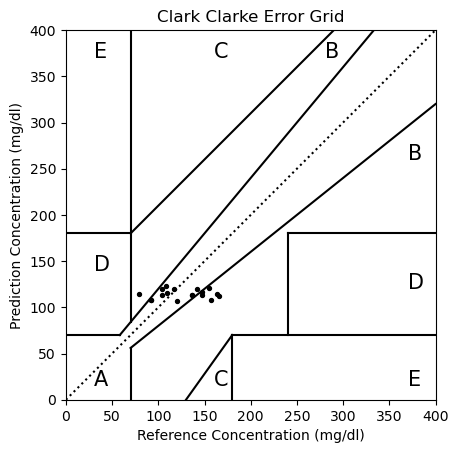

In [7]:
model = XGBRegressor(n_estimators=180,random_state=42, tree_method='hist', device='cuda', n_jobs=-1)
model.fit(X_train, y_train)
evaluate_image(test_data, model)

100


200
300
400
500
600
700
800
Best n_estimators:  800 0.6851477924875754


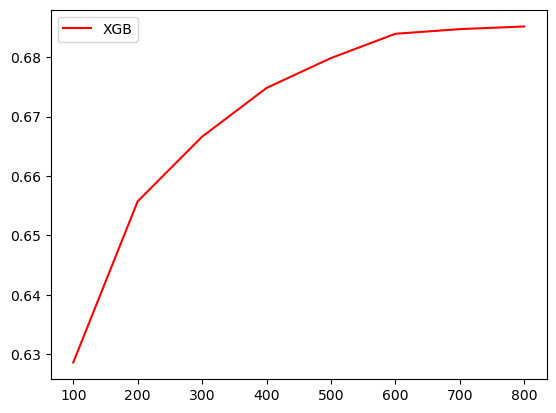

In [9]:
axisx = range(100, 900, 100)
rs = []
for i in axisx:
    print(i)
    model = XGBRegressor(n_estimators=i,random_state=42, tree_method='hist', device='cuda', n_jobs=-1)
    # rs.append(CVS(model,X_train,y_train,cv=cv,n_jobs=-1).mean())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    val_r2_score = r2_score(y_test, y_pred)
    rs.append(val_r2_score.mean())

print("Best n_estimators: ", axisx[rs.index(max(rs))],max(rs))
# plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

In [10]:
model = XGBRegressor()
print(model.get_params()['n_estimators'])

None


In [11]:
rs

[-19.284807421504436,
 0.10953594928418742,
 0.18261566557235598,
 0.23593083881485244,
 0.27464164420896153,
 0.32191720896385634,
 0.34447434642127883,
 0.38773751788120836,
 0.41678148316938146,
 0.4371204869367925,
 0.4541410443014984,
 0.47550686319576463,
 0.4897710414402787,
 0.5043748479736334,
 0.5355617589665242,
 0.5517519329347251,
 0.5615871712794778,
 0.5788761463082264,
 0.5944153264523995,
 0.6103004784676287,
 0.6192711849816137,
 0.6245361525169029,
 0.6418588265012553,
 0.6473100837147381,
 0.659640070036182,
 0.6660226136108527,
 0.6690138484545332,
 0.6760015995331617,
 0.6799660163238561,
 0.6874396731169099,
 0.6910238510120548,
 0.6965776686065184,
 0.7027690897017833,
 0.7075726933682743,
 0.710680829822236,
 0.7132235492182193,
 0.7161406105344947,
 0.7187914689261126,
 0.7267310578282608,
 0.7326023120258525,
 0.7355342996179097,
 0.7407672131789285,
 0.7445482659841912,
 0.7482948953416433,
 0.7509424818551078,
 0.7529204631729743,
 0.7545982118489718,
 0.75

In [ ]:
#选出来的n_estimators非常不寻常，我们是否要选择准确率最高的n_estimators值呢？

210 0.8721885073002668 2.7175761742618287e-06
180 0.8668547726148489 2.2482578312937418e-07
210 0.8721885073002668 2.7175761742618287e-06 0.016338495242308224


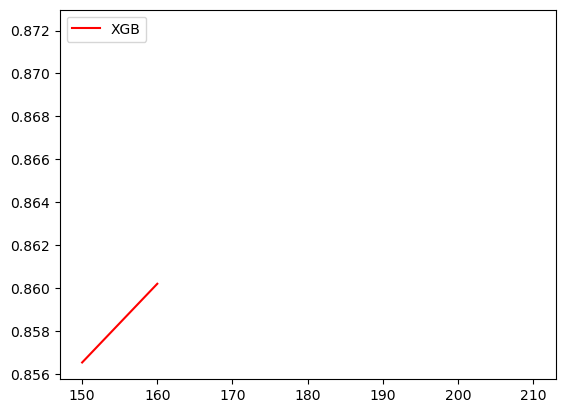

In [22]:
#======【TIME WARNING: 20s】=======#
axisx = range(230,250,1)
rs = []
var = []
ge = []
for i in axisx:
    model = XGBRegressor(n_estimators=i,random_state=42, tree_method='hist', device='cuda', n_jobs=-1)
    cvresult = CVS(model,X_train,y_train,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
#plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

179 0.8666001897903282 1.8312964551876055e-07
179 0.8666001897903282 1.8312964551876055e-07
179 0.8666001897903282 1.8312964551876055e-07 0.017795692493621985


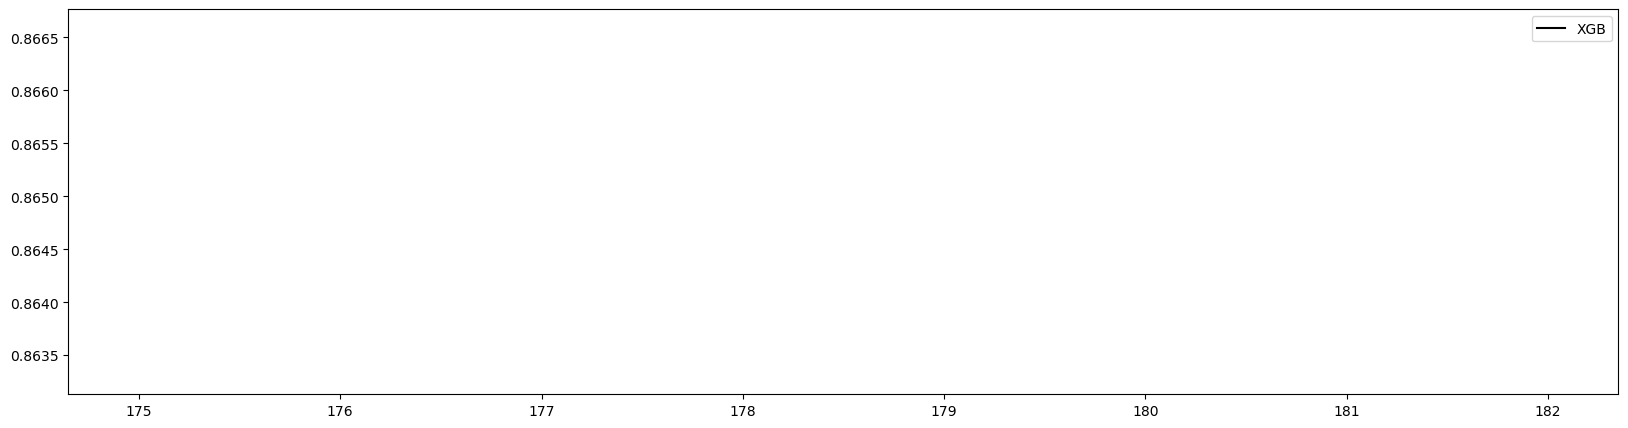

In [25]:
axisx = range(175,185,1)
rs = []
var = []
ge = []
for i in axisx:
    model = XGBRegressor(n_estimators=i,random_state=42, tree_method='hist', device='cuda', n_jobs=-1)
    cvresult = CVS(model,X_train,y_train,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

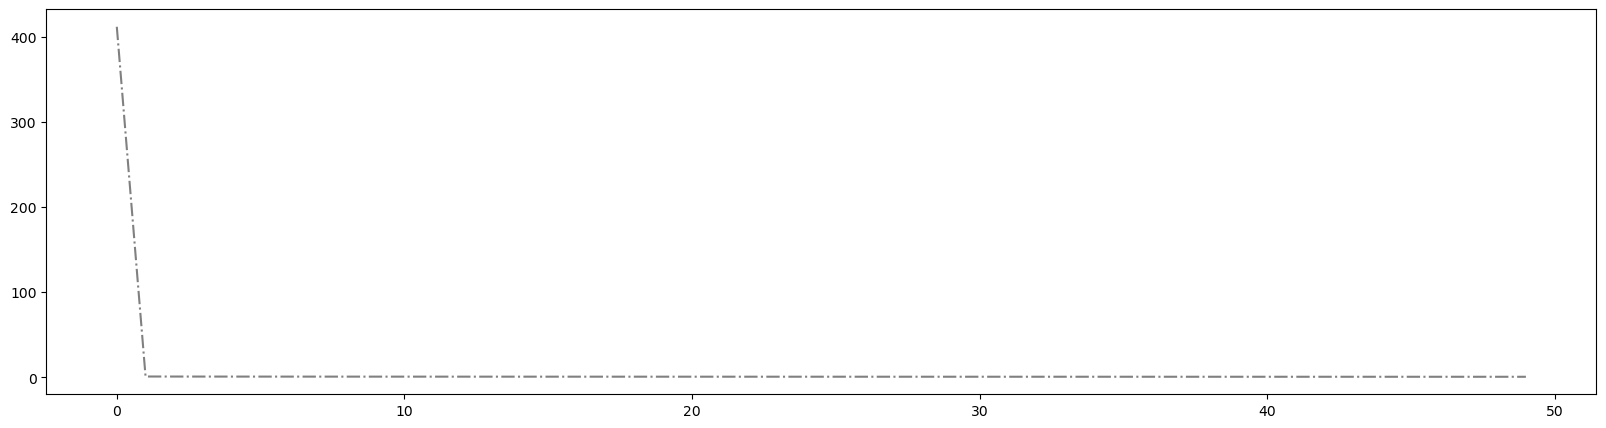

In [53]:
#看看泛化误差的可控部分如何？
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

In [ ]:
#验证模型效果是否提高了？
time0 = time()
print(XGBRegressor(n_estimators=100,random_state=42).fit(X_train,y_train).score(X_test,y_test))
print(time()-time0)

0.9197580267581366
0.0787498950958252


In [ ]:
time0 = time()
print(XGBRegressor(n_estimators=660,random_state=420).fit(X_train,y_train).score(X_test,y_test))
print(time()-time0)

0.9208745746309475
0.36807847023010254


In [ ]:
time0 = time()
print(XGBRegressor(n_estimators=180,random_state=420).fit(X_train,y_train).score(X_test,y_test))
print(time()-time0)

0.9231068620728082
0.12366437911987305


0.894736842105263 0.6933739752700381


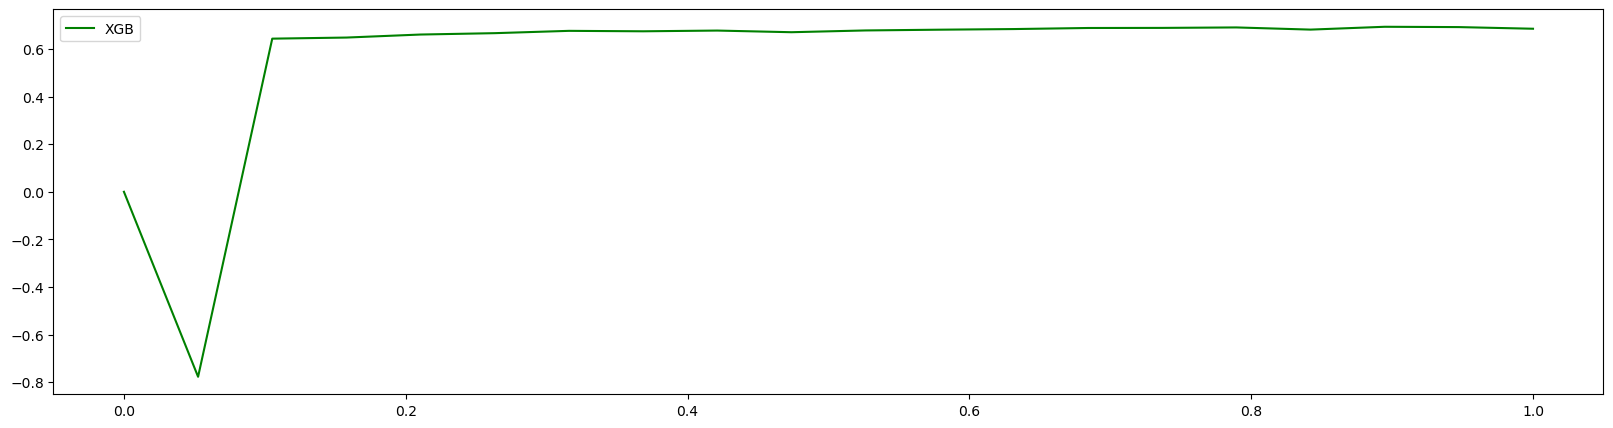

In [11]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    model = XGBRegressor(n_estimators=800,subsample=i,random_state=42, tree_method='hist', device='cuda', n_jobs=-1)
    # rs.append(CVS(model,X_train,y_train,cv=cv).mean())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    val_r2_score = r2_score(y_test, y_pred)
    rs.append(val_r2_score.mean())
print("Best subsample: ", axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

0.5236842105263158 0.8663538536325598 3.349447686772697e-06
0.6078947368421053 0.8653358574208495 7.786680313108694e-07
0.5236842105263158 0.8663538536325598 3.349447686772697e-06 0.017864641886554025


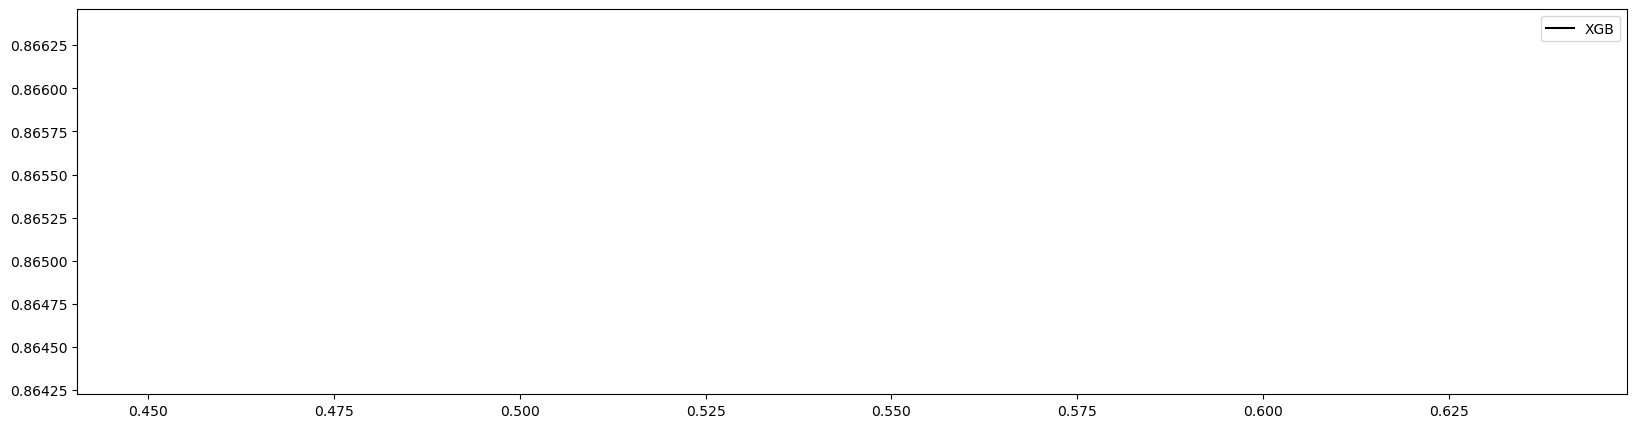

In [9]:
#继续细化学习曲线
axisx = np.linspace(0.45,0.65,20)
rs = []
var = []
ge = []
for i in axisx:
    model = XGBRegressor(n_estimators=180,subsample=i,random_state=42, tree_method='hist', device='cuda', n_job=-1)
    cvresult = CVS(model,X_train,y_train,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

0.7708333333333334 0.833489187182165 0.005575077682875093
0.7708333333333334 0.833489187182165 0.005575077682875093
0.7708333333333334 0.833489187182165 0.005575077682875093 0.033300928468131166


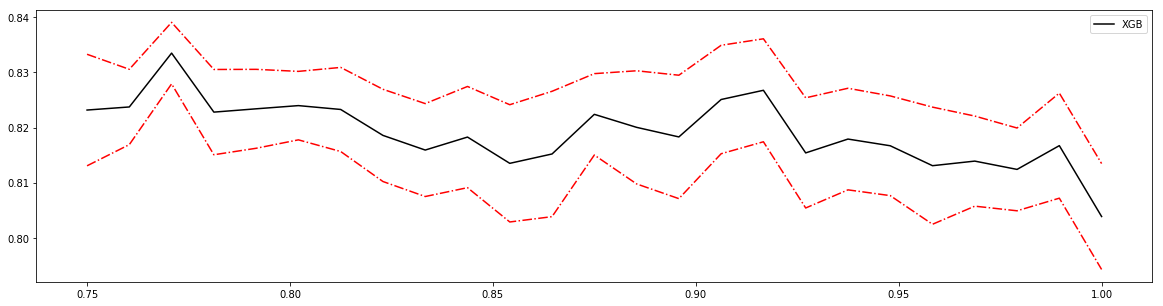

In [ ]:
#细化学习曲线
axisx = np.linspace(0.75,1,25)
rs = []
var = []
ge = []
for i in axisx:
    model = XGBRegressor(n_estimators=180,subsample=i,random_state=42, tree_method='hist', device='cuda', n_job=-1)
    cvresult = CVS(model,X_train,y_train,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

0.6933739752700381


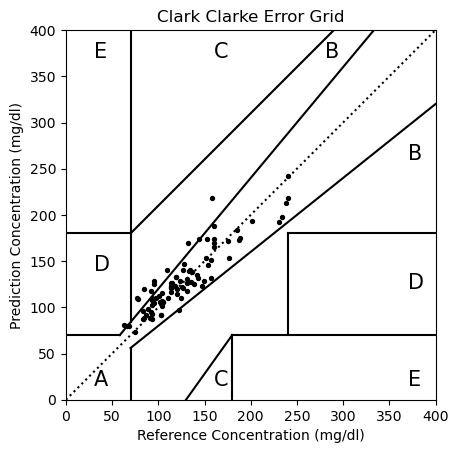

ARD:  [1.28216788e-01 1.35958418e-01 1.12879649e-01 7.40852579e-03
 1.62364542e-01 2.98423208e-02 3.99903394e-04 2.02345297e-01
 4.28617567e-01 3.39981839e-02 1.11126602e-01 5.66997975e-02
 1.06705382e-01 1.65094249e-02 2.16265216e-01 4.13477533e-02
 4.36354764e-02 1.14997163e-01 9.41491053e-02 1.80149928e-01
 1.08793341e-01 2.30658893e-02 5.39871044e-02 3.85253102e-01
 1.20282046e-01 2.62348317e-02 2.06699550e-01 1.66473344e-01
 1.69234410e-01 4.60537337e-02 1.04709797e-01 2.86032915e-01
 5.27454056e-02 1.42359465e-01 1.53665051e-01 1.07717685e-01
 5.43324575e-02 2.84687072e-01 4.53126132e-02 1.00560235e-02
 3.78719270e-02 1.10416776e-02 4.78845648e-02 2.80229151e-01
 1.65178344e-01 1.06833919e-04 3.39921147e-01 1.06876135e-01
 1.28286611e-02 6.58848584e-02 7.27345571e-02 2.96713524e-02
 8.37964267e-02 1.48407102e-01 6.99376017e-02 8.96343589e-02
 2.71975864e-02 2.27967687e-02 1.12308405e-01 1.12334520e-01
 3.49510051e-02 7.55831003e-02 1.00738987e-01 9.20746252e-02
 8.27877373e-02 4.

<Figure size 640x480 with 0 Axes>

In [15]:
model = XGBRegressor(n_estimators=800
                    ,subsample=0.894736842105263
                    ,random_state=42
                    ,tree_method='hist'
                    ,device='cuda'
                    ,n_job=-1).fit(X_train,y_train)
print(model.score(X_test,y_test))
evaluate_image_CEG(test_data, model, scaler_X=x_scaler)
ard = ard_image(test_data, model, scaler_X=x_scaler)
print("ARD: ", ard)
print("Average ARD: ", ard.mean())

In [ ]:
MSE(y_test,model.predict(X_test))

7.821523502888769

In [6]:
#首先我们先来定义一个评分函数，这个评分函数能够帮助我们直接打印Xtrain上的交叉验证结果
def regassess(model,X_train,y_train,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i] #模型评估指标的名字
                                     ,CVS(model
                                          ,X_train,y_train
                                          ,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(model,X_train,y_train,cv=cv,scoring=scoring[i]).mean())
    return score

In [10]:
from time import time
import datetime

for i in [0.1,0.2]:
    time0=time()
    model = XGBRegressor(n_estimators=250
           ,subsample=0.5236842105263158
           ,random_state=42
           ,tree_method='hist'
           ,device='cuda'
           ,n_job=-1
           ,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(model,X_train,y_train,cv,scoring = ["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate = 0.1
r2:0.82
neg_mean_squared_error:-131.21
02:33:605281
	
learning_rate = 0.2
r2:nan
neg_mean_squared_error:nan
02:22:833342
	


Best learning rate:  0.262 0.6980579387469175


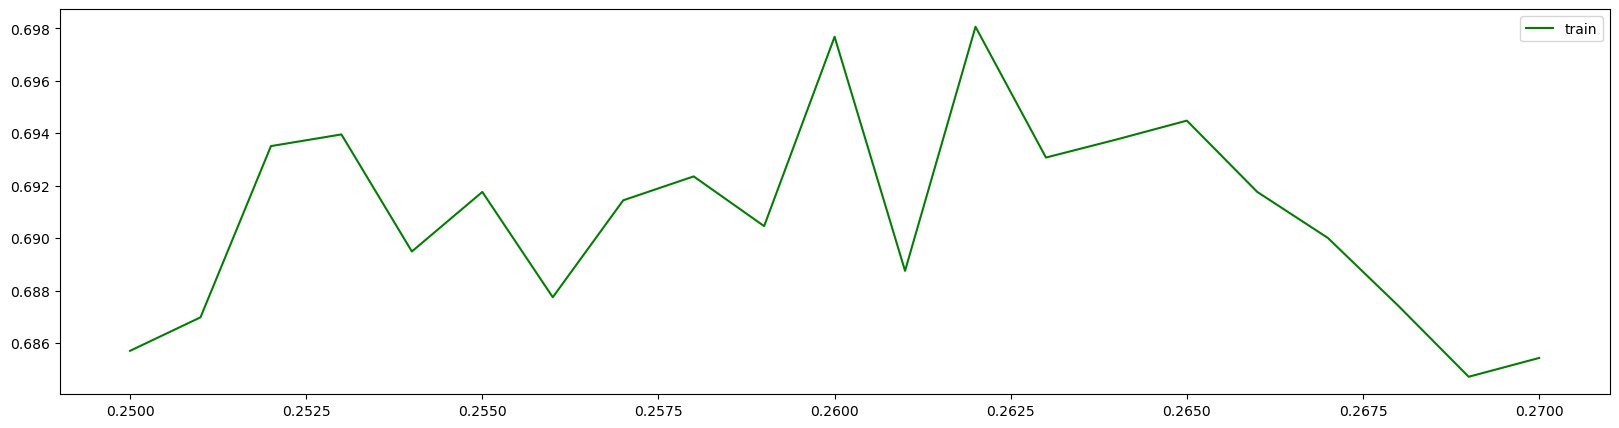

In [26]:
axisx = np.arange(0.25,0.27,0.001)
rs = []
te = []
for i in axisx:
    model = XGBRegressor(n_estimators=800
                    ,subsample=0.894736842105263
                    ,random_state=42
                    ,tree_method='hist'
                    ,device='cuda'
                    ,n_job=-1
                    ,learning_rate=i).fit(X_train,y_train)
    y_pred = model.predict(X_test)
    val_r2_score = r2_score(y_test, y_pred)
    rs.append(val_r2_score.mean())
print("Best learning rate: ", axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
# plt.plot(axisx,te,c="gray",label="test")
plt.plot(axisx,rs,c="green",label="train")
plt.legend()
plt.show()

In [18]:
for booster in ["gbtree","gblinear","dart"]:
    model = XGBRegressor(n_estimators=800
           ,subsample=0.894736842105263
           ,random_state=42
           ,tree_method='hist'
           ,device='cuda'
           ,n_job=-1
           ,learning_rate=0.13
           ,booster=booster).fit(X_train,y_train)
    print(booster)
    print(model.score(X_test,y_test))

gbtree
0.6984708575917273
gblinear
0.2749283677518122
dart
0.6953433511358621


In [19]:
print(X_train.shape, y_train.shape)

(1477970, 204) (1477970,)


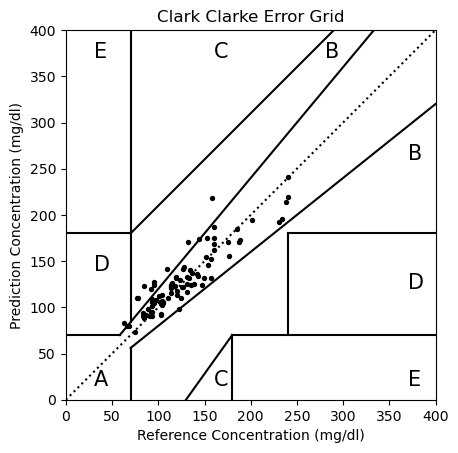

<Figure size 640x480 with 0 Axes>

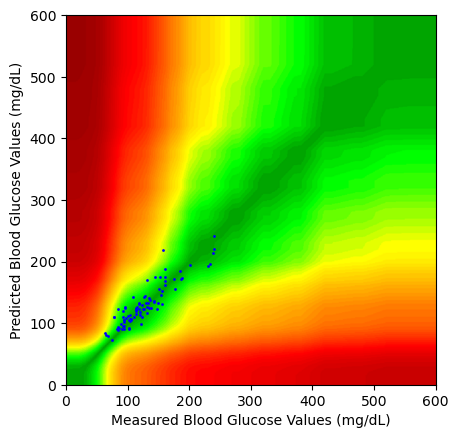

Pearson correlation coefficient: 0.9074624827286759
P-value: 3.853217605182116e-34
ARD:  [0.10883269 0.11852089 0.09096815 0.00138394 0.15944155 0.0314688
 0.00269444 0.1956402  0.45859006 0.02716436 0.11642595 0.05846752
 0.11876892 0.02196135 0.21943013 0.04659146 0.03315829 0.11762562
 0.08217255 0.12902118 0.11012673 0.01795593 0.05100053 0.40005133
 0.1051698  0.00766771 0.21017462 0.16500829 0.169013   0.0538814
 0.09898779 0.29995364 0.04539321 0.11774539 0.16345638 0.10010079
 0.04932639 0.28786352 0.00639016 0.00221596 0.03232596 0.01342077
 0.05541592 0.3211708  0.17818964 0.00489323 0.32901317 0.1120989
 0.01488985 0.03652458 0.06112486 0.02637537 0.09227163 0.12395678
 0.07919627 0.08449934 0.0041827  0.02292751 0.10003644 0.1152667
 0.03835752 0.06323976 0.09653381 0.09820872 0.06880561 0.04970274
 0.08901723 0.09299137 0.01518884 0.29980502 0.04333651 0.38742447
 0.00109381 0.02556822 0.07768255 0.08777148 0.15027013 0.01823965
 0.04571383 0.10869677 0.00808643 0.01310907

In [11]:
model = XGBRegressor(n_estimators=800
                    ,subsample=0.894736842105263
                    ,random_state=42
                    ,tree_method='hist'
                    ,device='cuda'
                    ,n_job=-1
                    ,learning_rate=0.26
                    ,gamma=0.006
                    ,max_depth=8).fit(X_train,y_train)
model.score(X_test,y_test)
evaluate_image_CEG(test_data, model, scaler_X=x_scaler)
evaluate_image_SEG(test_data, model, scaler_X=x_scaler)
evaluate_image_PCC(test_data, model, scaler_X=x_scaler)
ard = ard_image(test_data, model, scaler_X=x_scaler)
print("ARD: ", ard)
print("Average ARD: ", ard.mean())

Best gamma:  7 0.69619932511011


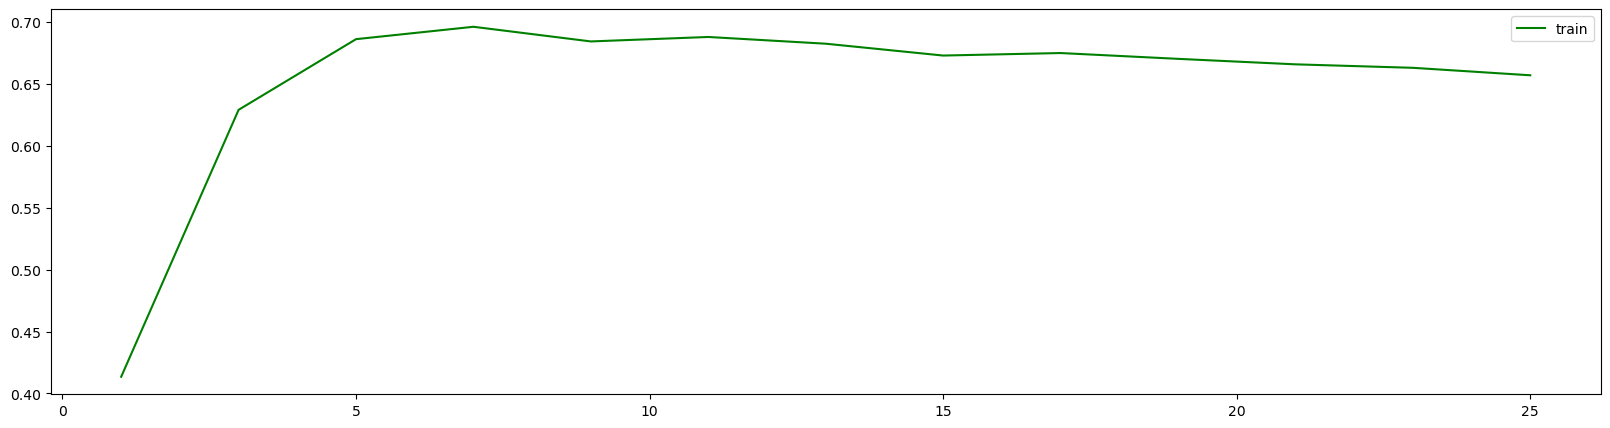

In [29]:
# Finding max_depth
axisx = np.arange(1, 27, 2)
rs = []
te = []
for i in axisx:
    model = XGBRegressor(n_estimators=800
                    ,subsample=0.894736842105263
                    ,random_state=42
                    ,tree_method='hist'
                    ,device='cuda'
                    ,n_job=-1
                    ,learning_rate=0.26
                    ,max_depth=i).fit(X_train,y_train)
    y_pred = model.predict(X_test)
    val_r2_score = r2_score(y_test, y_pred)
    rs.append(val_r2_score.mean())
print("Best max_depth: ", axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
# plt.plot(axisx,te,c="gray",label="test")
plt.plot(axisx,rs,c="green",label="train")
plt.legend()
plt.show()

In [30]:
max_depth = axisx[rs.index(max(rs))]

Best gamma:  0.006 0.6961993677618483


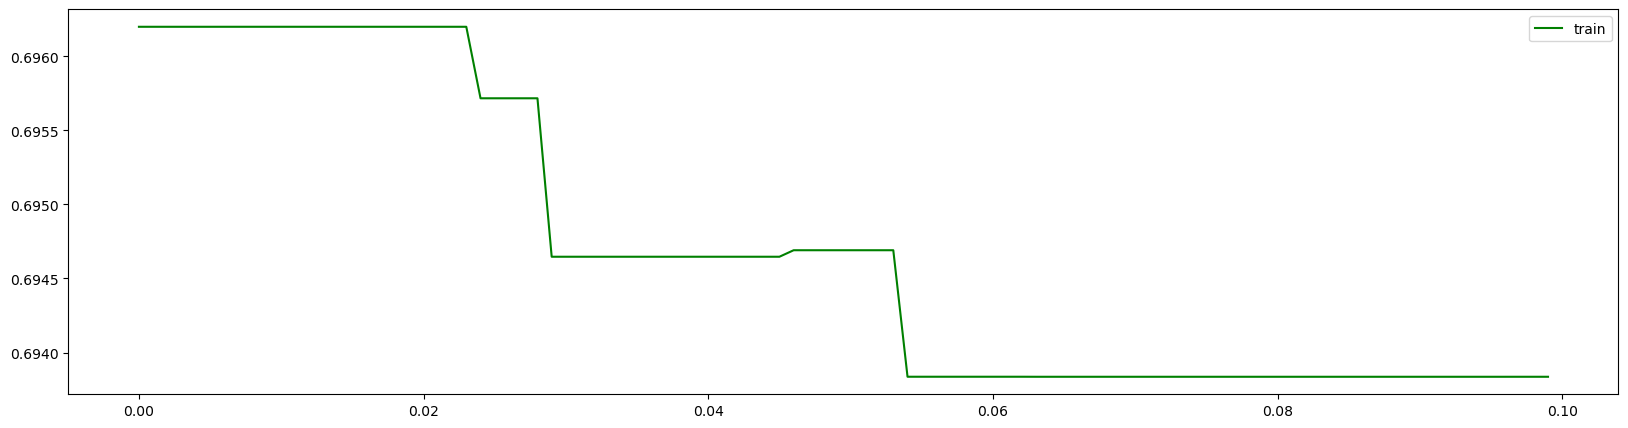

In [31]:
# Finding best gamma
axisx = np.arange(0, 0.1, 0.001)
rs = []
te = []
for i in axisx:
    model = XGBRegressor(n_estimators=800
                    ,subsample=0.894736842105263
                    ,random_state=42
                    ,tree_method='hist'
                    ,device='cuda'
                    ,n_job=-1
                    ,learning_rate=0.26
                    ,max_depth=7
                    ,gamma=i).fit(X_train,y_train)
    y_pred = model.predict(X_test)
    val_r2_score = r2_score(y_test, y_pred)
    rs.append(val_r2_score.mean())
print("Best gamma: ", axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
# plt.plot(axisx,te,c="gray",label="test")
plt.plot(axisx,rs,c="green",label="train")
plt.legend()
plt.show()

In [ ]:
#写明参数
param = {'silent':True #默认为False，通常要手动把它关闭掉
         ,'objective':'model:linear'
         ,"eta":0.85}
num_round = 10 #n_estimators

In [ ]:
#设定参数
param1 = {'silent':True,'obj':'model:linear',"gamma":0}
num_round = 100
n_fold=5 #sklearn - KFold

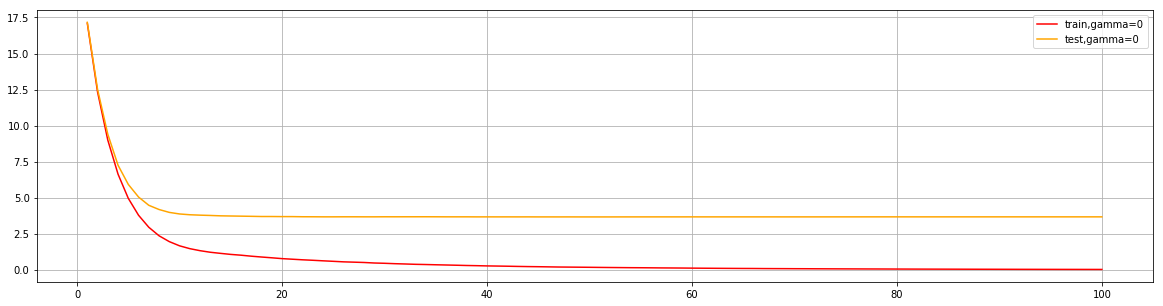

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

#从这个图中，我们可以看出什么？
#怎样从图中观察模型的泛化能力？
#从这个图的角度来说，模型的调参目标是什么？

In [ ]:
#xgboost中回归模型的默认模型评估指标是什么？

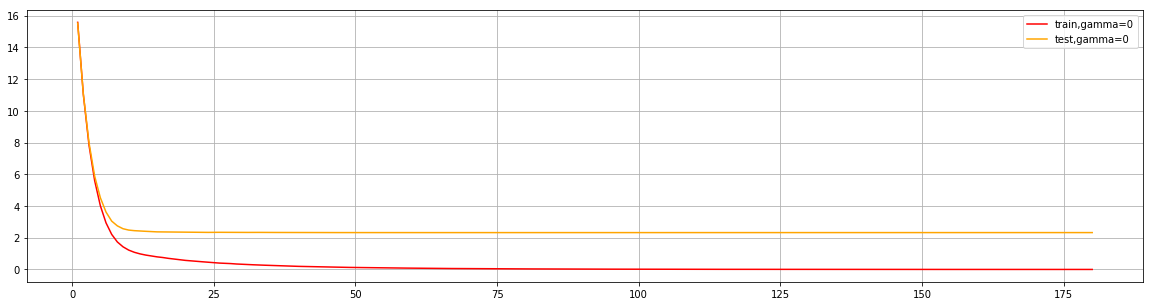

In [ ]:
param1 = {'silent':True,'obj':'model:linear',"gamma":0,"eval_metric":"mae"}
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

In [ ]:
param1 = {'silent':True,'obj':'model:linear',"gamma":0}
param2 = {'silent':True,'obj':'model:linear',"gamma":20}
num_round = 180
n_fold=5

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:01:083104


In [ ]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:01:359378


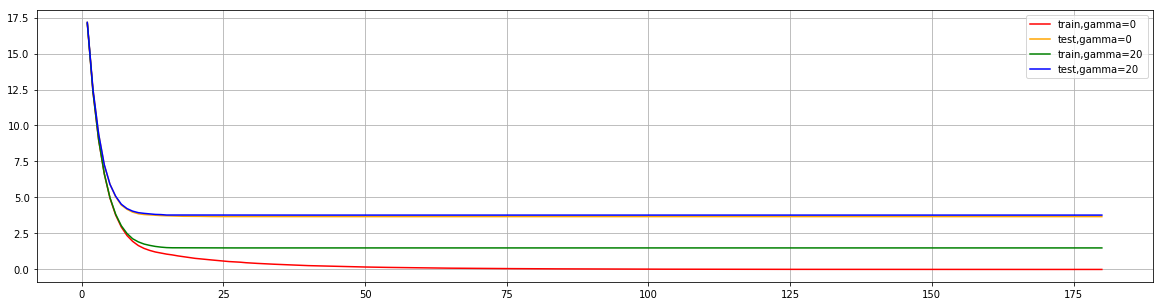

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,181),cvresult2.iloc[:,0],c="green",label="train,gamma=20")
plt.plot(range(1,181),cvresult2.iloc[:,2],c="blue",label="test,gamma=20")
plt.legend()
plt.show()

#从这里，你看出gamma是如何控制过拟合了吗？控制训练集上的训练 - 降低训练集上的表现

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from time import time
import datetime

In [ ]:
from sklearn.datasets import load_breast_cancer
data2 = load_breast_cancer()

x2 = data2.data
y2 = data2.target

dfull2 = xgb.DMatrix(x2,y2)

param1 = {'silent':True,'obj':'binary:logistic',"gamma":0,"nfold":5
          ,"eval_metrics":"error"
         }
param2 = {'silent':True,'obj':'binary:logistic',"gamma":1,"nfold":5}
num_round = 100

In [ ]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull2, num_round,metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:271581


In [ ]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull2, num_round,metrics=("error")) 
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:443810


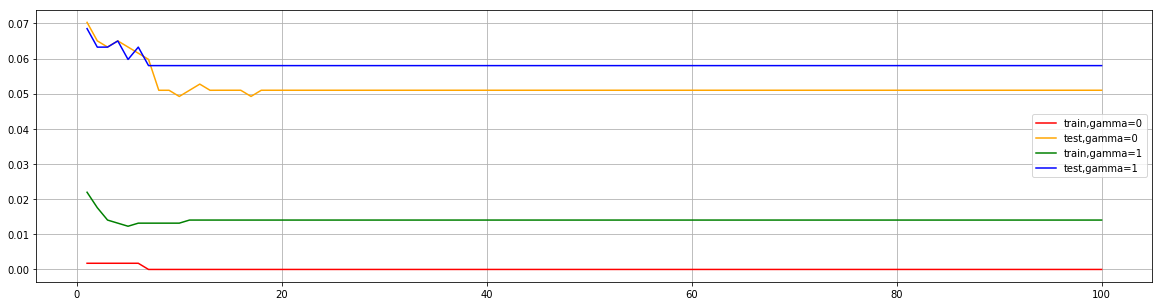

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,101),cvresult2.iloc[:,0],c="green",label="train,gamma=1")
plt.plot(range(1,101),cvresult2.iloc[:,2],c="blue",label="test,gamma=1")
plt.legend()
plt.show()

In [ ]:
dfull = xgb.DMatrix(X,y)

param1 = {'silent':True
          ,'obj':'model:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200

00:00:513584


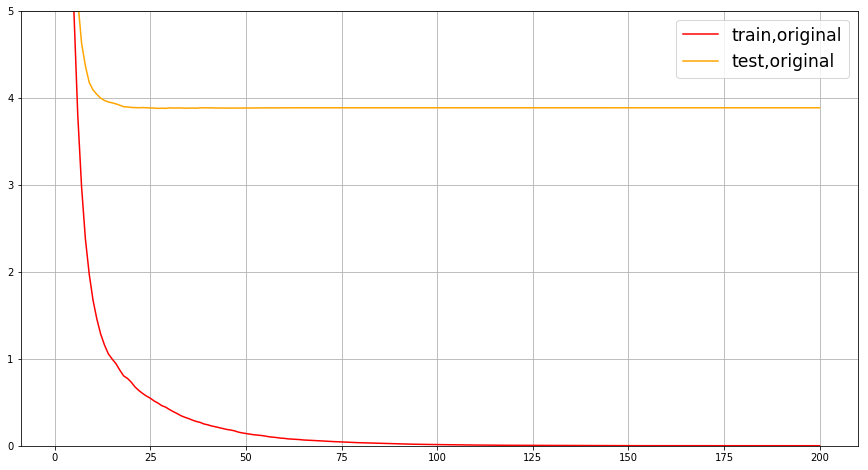

In [ ]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

00:00:532621
00:00:223373
00:00:259346


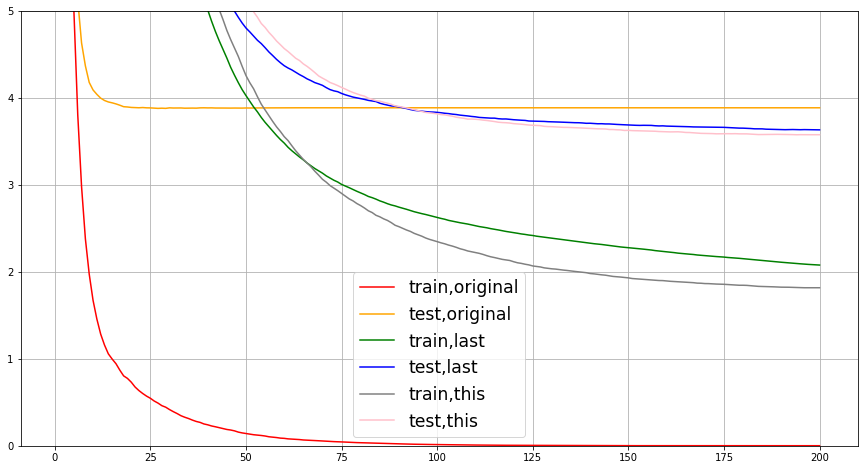

In [ ]:
param1 = {'silent':True
          ,'obj':'model:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")

param2 = {'silent':True
          ,'obj':'model:linear'
          ,"max_depth":2
          ,"eta":0.05
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":0.4
          ,"colsample_bynode":1
          ,"nfold":5}

param3 = {'silent':True
          ,'obj':'model:linear'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1
          ,"nfold":5}

time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvresult3 = xgb.cv(param3, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,201),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,201),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

In [ ]:
import pickle

In [ ]:
dtrain = xgb.DMatrix(X_train,y_train)

#设定参数，对模型进行训练
param = {'silent':True
          ,'obj':'model:linear'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1}
num_round = 180

bst = xgb.train(param, dtrain, num_round)

In [ ]:
#保存模型
pickle.dump(bst, open("xgboostonboston.dat","wb"))

#注意，open中我们往往使用w或者r作为读取的模式，但其实w与r只能用于文本文件 - txt
#当我们希望导入的不是文本文件，而是模型本身的时候，我们使用"wb"和"rb"作为读取的模式
#其中wb表示以二进制写入，rb表示以二进制读入，使用open进行保存的这个文件中是一个可以进行读取或者调用的模型

In [ ]:
#看看模型被保存到了哪里？
import sys
sys.path

['C:\\Pythonwork\\micro-class\\11 xgboost',
 'C:\\Python\\python37.zip',
 'C:\\Python\\DLLs',
 'C:\\Python\\lib',
 'C:\\Python',
 '',
 'C:\\Python\\lib\\site-packages',
 'C:\\Python\\lib\\site-packages\\win32',
 'C:\\Python\\lib\\site-packages\\win32\\lib',
 'C:\\Python\\lib\\site-packages\\Pythonwin',
 'C:\\Python\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Shuyu\\.ipython']

In [ ]:
#重新打开jupyter lab

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pickle
import xgboost as xgb

data = load_boston()

X = data.data
y = data.target

X_train,X_test,y_train,y_test = TTS(X,y,test_size=0.3,random_state=420)

In [ ]:
#注意，如果我们保存的模型是xgboost库中建立的模型，则导入的数据类型也必须是xgboost库中的数据类型
dtest = xgb.DMatrix(X_test,y_test)

In [ ]:
#导入模型
loaded_model = pickle.load(open("xgboostonboston.dat", "rb"))
print("Loaded model from: xgboostonboston.dat")

Loaded model from: xgboostonboston.dat


In [ ]:
#做预测，直接调用接口predict
ypreds = loaded_model.predict(dtest)

In [ ]:
ypreds

array([ 9.244746, 22.536953, 28.47614 , 13.126131,  9.944413, 21.356094,
       15.187935, 15.559099, 15.629611, 15.555439, 21.427156, 35.502792,
       20.827318, 29.397932, 21.669186, 11.906522, 21.464252, 26.143337,
       26.300356, 23.474188, 18.186035, 15.851086, 22.928507, 22.919674,
       20.557487, 16.27315 , 22.000988, 25.230766, 23.12165 , 16.663473,
       34.747093, 20.003593, 20.617601, 23.74025 , 23.044952, 24.849056,
       15.414761, 23.383522, 18.500463, 33.790466, 18.009186, 18.729418,
       33.181175, 18.834534, 15.085677, 27.601177, 42.75243 , 15.359873,
       10.37829 , 37.5367  , 27.097404, 20.73775 , 20.198935, 46.20087 ,
       26.959623, 24.566458, 18.678255, 20.913795, 17.369501, 17.823708,
       15.136806, 24.533068, 19.465569, 30.474009, 29.571526, 19.773672,
       21.554045, 17.590807, 22.250225, 18.275839, 29.012346, 40.198055,
       30.235825, 23.174484, 20.191778, 23.742437, 38.217915, 27.173447,
       21.068003, 20.5974  , 18.412853, 45.326836, 

In [ ]:
from sklearn.metrics import mean_squared_error as MSE, r2_score
MSE(y_test,ypreds)

9.107608696116197

In [ ]:
r2_score(y_test,ypreds)

0.9021254331073938

In [ ]:
bst = xgb.train(param, dtrain, num_round)

In [ ]:
import joblib

#同样可以看看模型被保存到了哪里
joblib.dump(bst,"xgboost-boston.dat")

['xgboost-boston.dat']

In [ ]:
loaded_model = joblib.load("xgboost-boston.dat")

In [ ]:
dtest = xgb.DMatrix(X_test,y_test)
ypreds = loaded_model.predict(dtest)

In [ ]:
ypreds

array([ 9.244746, 22.536953, 28.47614 , 13.126131,  9.944413, 21.356094,
       15.187935, 15.559099, 15.629611, 15.555439, 21.427156, 35.502792,
       20.827318, 29.397932, 21.669186, 11.906522, 21.464252, 26.143337,
       26.300356, 23.474188, 18.186035, 15.851086, 22.928507, 22.919674,
       20.557487, 16.27315 , 22.000988, 25.230766, 23.12165 , 16.663473,
       34.747093, 20.003593, 20.617601, 23.74025 , 23.044952, 24.849056,
       15.414761, 23.383522, 18.500463, 33.790466, 18.009186, 18.729418,
       33.181175, 18.834534, 15.085677, 27.601177, 42.75243 , 15.359873,
       10.37829 , 37.5367  , 27.097404, 20.73775 , 20.198935, 46.20087 ,
       26.959623, 24.566458, 18.678255, 20.913795, 17.369501, 17.823708,
       15.136806, 24.533068, 19.465569, 30.474009, 29.571526, 19.773672,
       21.554045, 17.590807, 22.250225, 18.275839, 29.012346, 40.198055,
       30.235825, 23.174484, 20.191778, 23.742437, 38.217915, 27.173447,
       21.068003, 20.5974  , 18.412853, 45.326836, 

In [ ]:
MSE(y_test, ypreds)

9.107608696116197

In [ ]:
r2_score(y_test,ypreds)

0.9021254331073938

In [ ]:
#使用sklearn中的模型
from xgboost import XGBRegressor as XGBRegressor

bst = XGBRegressor(n_estimators=200
           ,eta=0.05,gamma=20
           ,reg_lambda=3.5
           ,reg_alpha=0.2
           ,max_depth=4
           ,colsample_bytree=0.4
           ,colsample_bylevel=0.6).fit(X_train,y_train) #训练完毕

In [ ]:
joblib.dump(bst,"xgboost-boston-sklearn.dat")

['xgboost-boston-sklearn.dat']

In [ ]:
loaded_model = joblib.load("xgboost-boston-sklearn.dat")

In [ ]:
#则这里可以直接导入Xtest,直接是我们的numpy
ypreds = loaded_model.predict(X_test)

In [ ]:
X_test

array([[4.15292e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.29460e+02, 2.73800e+01],
       [2.73100e-02, 0.00000e+00, 7.07000e+00, ..., 1.78000e+01,
        3.96900e+02, 9.14000e+00],
       [3.15000e-02, 9.50000e+01, 1.47000e+00, ..., 1.70000e+01,
        3.96900e+02, 4.56000e+00],
       ...,
       [5.08300e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.89710e+02, 5.68000e+00],
       [3.77498e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.20100e+01, 1.71500e+01],
       [1.96091e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.34400e+01]])

In [ ]:
dtest

In [ ]:
ypreds

array([ 9.350334 , 21.501623 , 30.219057 , 13.021226 ,  9.883689 ,
       20.977922 , 16.023008 , 15.8910475, 15.512305 , 15.706607 ,
       22.096102 , 35.381573 , 20.3307   , 27.129421 , 19.997156 ,
       10.935587 , 20.25071  , 26.188572 , 26.711943 , 22.600443 ,
       18.23832  , 15.876045 , 26.263977 , 22.706024 , 20.18491  ,
       15.891692 , 21.4781   , 29.047956 , 23.371012 , 17.167185 ,
       35.699898 , 20.490337 , 20.195292 , 23.81444  , 23.106022 ,
       25.709312 , 15.0182905, 22.621248 , 18.576109 , 34.25664  ,
       17.46115  , 19.159126 , 34.79234  , 17.766731 , 17.141891 ,
       27.755646 , 39.786766 , 22.49913  , 10.246634 , 36.76105  ,
       26.294876 , 20.75917  , 19.893272 , 46.62629  , 26.549704 ,
       24.040398 , 17.769514 , 20.76889  , 16.139618 , 17.494894 ,
       16.005596 , 24.28487  , 19.15237  , 31.407684 , 27.862312 ,
       18.877817 , 20.50497  , 16.094156 , 22.622025 , 17.762297 ,
       28.518019 , 41.146317 , 32.52681  , 23.117966 , 19.1251

In [ ]:
MSE(y_test, ypreds)

10.198269690947479

In [ ]:
r2_score(y_test,ypreds)

0.8904046866351292

In [ ]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs #自创数据集
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc

In [ ]:
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [ ]:
X.shape

(550, 2)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
(y == 1).sum() / y.shape[0] #9%

0.09090909090909091

In [ ]:
X_train, X_test, y_train, y_test = TTS(X,y,test_size=0.3,random_state=420)

In [ ]:
#在sklearn下建模#

clf = XGBC().fit(X_train,y_train)
ypred = clf.predict(X_test)

In [ ]:
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
clf.score(X_test,y_test) #默认模型评估指标 - 准确率

0.9272727272727272

In [ ]:
cm(y_test,ypred,labels=[1,0]) #少数类写在前面

array([[  9,   4],
       [  8, 144]], dtype=int64)

In [ ]:
recall(y_test,ypred)

0.6923076923076923

In [ ]:
auc(y_test,clf.predict_proba(X_test)[:,1])

0.9671052631578947

In [ ]:
#负/正样本比例
clf_ = XGBC(scale_pos_weight=10).fit(X_train,y_train)
ypred_ = clf_.predict(X_test)
clf_.score(X_test,y_test)

cm(y_test,ypred_,labels=[1,0])

recall(y_test,ypred_)

auc(y_test,clf_.predict_proba(X_test)[:,1])

0.9696356275303644

In [ ]:
#随着样本权重逐渐增加，模型的recall,auc和准确率如何变化？
for i in [1,5,10,20,30]:
    clf_ = XGBC(scale_pos_weight=i).fit(X_train,y_train)
    ypred_ = clf_.predict(X_test)
    print(i)
    print("\tAccuracy:{}".format(clf_.score(X_test,y_test)))
    print("\tRecall:{}".format(recall(y_test,ypred_)))
    print("\tAUC:{}".format(auc(y_test,clf_.predict_proba(X_test)[:,1])))

1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9671052631578947
5
	Accuracy:0.9454545454545454
	Recall:0.9230769230769231
	AUC:0.9665991902834008
10
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9696356275303644
20
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9706477732793523
30
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9701417004048584


In [ ]:
#负/正样本比例
clf_ = XGBC(scale_pos_weight=20).fit(X_train,y_train)
ypred_ = clf_.predict(X_test)
clf_.score(X_test,y_test)

0.9515151515151515

In [ ]:
cm(y_test,ypred_,labels=[1,0])

array([[ 13,   0],
       [  8, 144]], dtype=int64)

In [ ]:
recall(y_test,ypred_)

1.0

In [ ]:
auc(y_test,clf_.predict_proba(X_test)[:,1])

0.9706477732793523

In [ ]:
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)

In [ ]:
#看看xgboost库自带的predict接口
param = {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":1}
num_round = 100

In [ ]:
bst = xgb.train(param, dtrain, num_round)

In [ ]:
preds = bst.predict(dtest)

In [ ]:
#看看preds返回了什么？
preds

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 0.93531454,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.63748044, 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 0.91610

In [ ]:
#自己设定阈值
ypred = preds.copy()

In [ ]:
ypred[preds > 0.5] = 1

In [ ]:
ypred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [ ]:
ypred[ypred != 1] = 0

In [ ]:
#写明参数
scale_pos_weight = [1,5,10]
names = ["negative vs positive: 1"
         ,"negative vs positive: 5"
         ,"negative vs positive: 10"]

In [ ]:
[*zip(names,scale_pos_weight)]

[('negative vs positive: 1', 1),
 ('negative vs positive: 5', 5),
 ('negative vs positive: 10', 10)]

In [ ]:
#导入模型评估指标
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, roc_auc_score as auc

for name,i in zip(names,scale_pos_weight):
    param = {'silent':True,'objective':'binary:logistic'
            ,"eta":0.1,"scale_pos_weight":i}
    num_round = 100
    clf = xgb.train(param, dtrain, num_round)
    preds = clf.predict(dtest)
    ypred = preds.copy()
    ypred[preds > 0.5] = 1
    ypred[ypred != 1] = 0
    print(name)
    print("\tAccuracy:{}".format(accuracy(y_test,ypred)))
    print("\tRecall:{}".format(recall(y_test,ypred)))
    print("\tAUC:{}".format(auc(y_test,preds)))

negative vs positive: 1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
negative vs positive: 5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9635627530364372
negative vs positive: 10
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9665991902834008


In [ ]:
#当然我们也可以尝试不同的阈值
for name,i in zip(names,scale_pos_weight):
    for thres in [0.3,0.5,0.7,0.9]:
        param= {'silent':True,'objective':'binary:logistic'
                ,"eta":0.1,"scale_pos_weight":i}
        clf = xgb.train(param, dtrain, num_round)
        preds = clf.predict(dtest)
        ypred = preds.copy()
        ypred[preds > thres] = 1
        ypred[ypred != 1] = 0
        print("{},thresholds:{}".format(name,thres))
        print("\tAccuracy:{}".format(accuracy(y_test,ypred)))
        print("\tRecall:{}".format(recall(y_test,ypred)))
        print("\tAUC:{}".format(auc(y_test,preds)))

negative vs positive: 1,thresholds:0.3
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.5
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.7
	Accuracy:0.9212121212121213
	Recall:0.6153846153846154
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.9
	Accuracy:0.9515151515151515
	Recall:0.5384615384615384
	AUC:0.9741902834008097
negative vs positive: 5,thresholds:0.3
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.7
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.9
	Accuracy:0.9212121212121213
	Recall:0.6153846153846154
	AUC:0.9635627530364372
negative vs positive: 10,thresholds:0.3
	Accuracy:0.95151515151